<a href="https://colab.research.google.com/github/matpg/Proyecto-Data-Science---Online-Shoppers-Intention/blob/master/Proyecto_Parte_III_Online_Shoppers_Intention_fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando librerias



Primero importamos algunas de las librerías que usaremos.


In [1]:
# Librerias basicas para manejo del data set
import numpy as np
import pandas as pd

# Librerias para la visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Descarga de dataset


Por comodidad descargamos el dataset "online_shoppers_intention" directamente a la instancia de google drive (o en el lugar que se ejecute).


In [2]:
# Se obtiene el dataset desde el link de descarga
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv

--2020-07-20 19:43:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1072063 (1.0M) [application/x-httpd-php]
Saving to: ‘online_shoppers_intention.csv’

online_shoppers_int 100%[===================>]   1.02M  2.65MB/s    in 0.4s    

2020-07-20 19:43:52 (2.65 MB/s) - ‘online_shoppers_intention.csv’ saved [1072063/1072063]



# ¿Qué contiene este dataset exactamente?


Para entender con qué estamos tratando debemos analizar que es cada valor y entender qué significan, para ello revisamos la documentación del dataset publicada por el autor.

## Información oficial de los atrubutos:

*******
The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year. 
*****



Ya teniendo una buena idea de lo que estamos viendo, procedemos a guardar el dataset en la variable df (que usaremos en el resto del código) para revisar de qué se conforman los datos mostrando las primeras y las últimas filas.

Acá notamos el primer problema para continuar con el análisis mas detallado. No existe consistencia en los tipos de datos, cosa que revisaremos en unos pasos mas adelante.


In [3]:
# Lectura de dataset
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


Ahora viendo la dimensión del dataset notamos que hay 12330 filas y 18 columnas.

In [5]:
df.shape

(12330, 18)

Para complementar aún mas la información que ya tenemos, ahora revisamos una descripción que nos entrega la función *describe()*, en la que podemos ver, por ejemplo, que no hay datos en blanco en ninguna columna, o el rango de los valores de cada columna.

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Con la siguiente linea de ejecución notamos que no tenemos ningún dato nulo, por lo que no es necesario buscar una solución a ese problema que se da comunmente en los datasets.

In [7]:
# Comprobando los datos NULL del dataset
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Revisando los datos de cada columna podemos ver qué tipos de datos contiene exactamente cada columna, y como ya lo habiamos notado con el *head*, tendremos que realizar algunos cambios en el dataset. 

Habiendo analizado el *head* y complementando con la nueva información, notamos que existen columnas de tipo **float64** que efectivamente contienen numeros con decimales, y si bien existe la posibilidad de redondear esos numeros, decidimos que cambiaremos todas los demas tipos de datos a float para así no tener esa perdida de información.

In [8]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

# Reemplazo de atributos

En el paso anterior notamos que hay dos columnas de tipo *object* (Month y VisitorType), lo cual queremos cambiar para mantener todas las columnas en tipo *float64*. Estó se realiza en la siguiente celda de ejecución usando un diccionario para esas dos columnas.

Notese que para el caso de los meses mantenemos los numeros reales (Enero:1, Febrero:2, .... , Diciembre:12) para asi mantener una concordancia y poder entender los datos si llega a ser necesario revisarlos.

Otra cosa a considerar es que evitamos el numero 0, ya que al realizar un posterior analisis esté puede interferir con los resultados.

Además en el dataset no se encuentra ningún valor con *January* ni *April* por lo que simplemente los omitimos.

In [9]:
df["Month"].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [10]:
df["VisitorType"].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [11]:
df.Month=df.Month.map({'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9, 'Dec':12})
df.VisitorType=df.VisitorType.map({'Returning_Visitor': 1, 'New_Visitor': 2, 'Other': 3})

Una vez hecho el cambio volvemos a revisar el *head* para corroborar que efectivamente se realizó algún cambio, el cual notamos que si se realizó.

In [12]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,True,False


De paso nos pareció interesante revisar que podemos sacar de estas columnas que acabamos de editar y con encontramos con un gran incremento de compras en los meses marzo, mayo, noviembre y diciembre.

In [13]:
df['Month'].value_counts()

5     3364
11    2998
3     1907
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: Month, dtype: int64

Y en VisitorType nos encontramos con que la mayoría son compradores que ya habían comprado antes.

1  Returning_Visitor

2 New_Visitor

3 Other

In [14]:
df['VisitorType'].value_counts()

1    10551
2     1694
3       85
Name: VisitorType, dtype: int64

Corroboramos tambien que ya no existen tipos de datos *object*.

In [15]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                       bool
Revenue                       bool
dtype: object

Y ahora procedemos a cambiar todas las columnas que no son *float64* para una consistencia completa en los datos.

In [16]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [17]:
df=df.astype({'Administrative': 'float64', 'Informational': 'float64', 'ProductRelated': 'float64', 
           'Month': 'float64', 'OperatingSystems': 'float64', 'Browser': 'float64', 'Region': 'float64', 
           'TrafficType': 'float64', 'VisitorType': 'float64', 'Weekend': 'float64', 'Revenue': 'float64'})

Volvemos a revisar el tipo de datos de las columnas y notamos que el cambio fué exitoso.

In [18]:
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                      float64
OperatingSystems           float64
Browser                    float64
Region                     float64
TrafficType                float64
VisitorType                float64
Weekend                    float64
Revenue                    float64
dtype: object

Para rescatar información adicional sobre el dataset que se está analizando, hacemos un contea de los true y false de la clsae Revenue lo que nos revela que en la mayoría de los casos observados, no se realizó la compra.

In [19]:
Contador_false = 0
Contador_true = 0

for row in df.Revenue:
  if row == 0.0:
    Contador_false += 1

for row in df.Revenue:
  if row == 1.0:
    Contador_true += 1

print(f"El Dataset cuenta con {Contador_false} falsos en la clase Revenue")
print(f"El Dataset cuenta con {Contador_true} verdaderos en la clase Revenue")

El Dataset cuenta con 10422 falsos en la clase Revenue
El Dataset cuenta con 1908 verdaderos en la clase Revenue


# Análisis de la correlación

Ahora que finalmente tenemos los datos que estabamos buscando procedemos a realizar un análisis completo de los datos.

## Pairplot

Con el Pairplot podemos ver con gran detalle la correlación entre las distintas variables, donde en un Scatterplot en el que se tenga una tendencia *x = y* significa que existe correlación positiva.

Acá se observa que entre 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated' y 'ProductRelated_Duration' es donde existe mayor correlación entre las variables

También se obserba que 'BounceRates', 'ExitRates' y 'PageValues' presentan correlación negativa ya que se aprecia una forma de curva en lugar de una recta cercana al *x = y*. Aunque existe una excepción en la que 'BounceRates' y 'ExitRates' las que tienen una correlación positiva mas fuerte y probablemente la de mayor correlación entre todas las variables. 

Por otro lado tambien se puede extraer del gráfico que no hay ninguna variable que influya directamente en el resultado de la variable 'Revenue' (la clase del dataset).

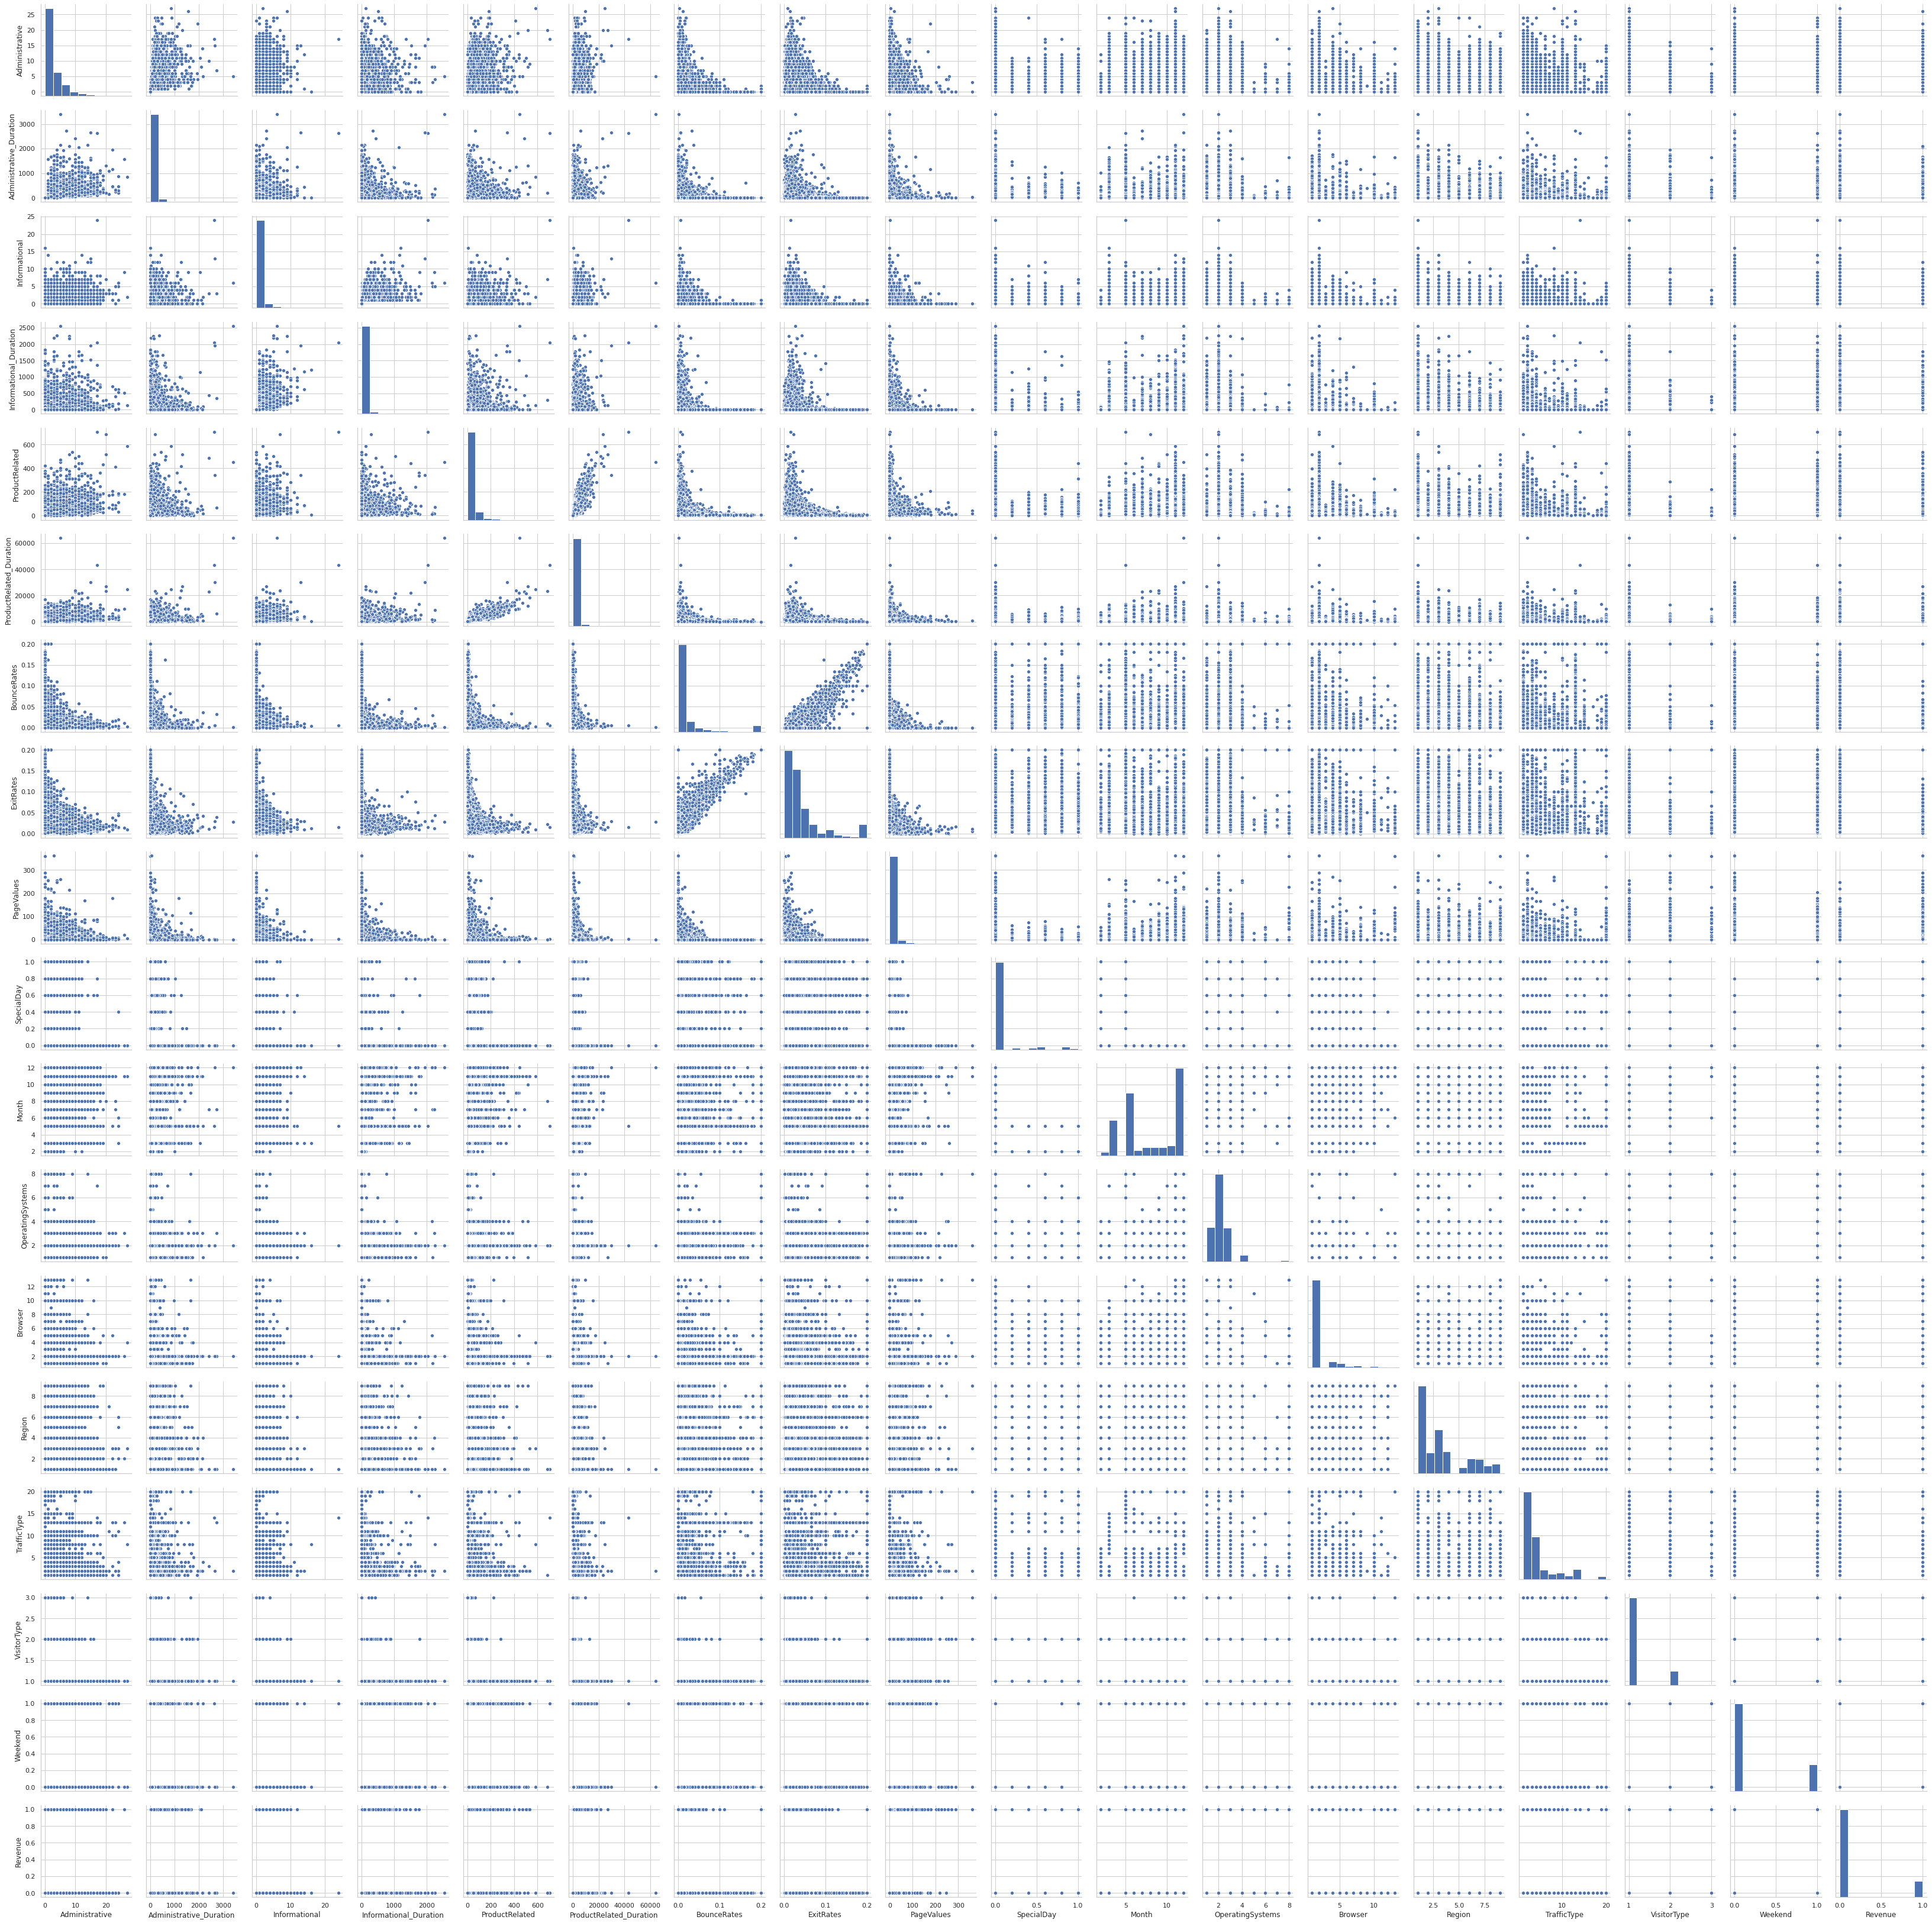

In [20]:
import matplotlib.pyplot as plt

sns.set(style='whitegrid', context='notebook')
cols = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue']
sns.pairplot(df[cols], height=2.5);
plt.show()

# Heatmap

Para buscar mas información que se pueda extraer del dataset y la correlación de sus variablas se ploteó un heatmap, en el cual se puede confirmar que las afirmacines concluidas con el pairplot eran correctas y además se puede ver información extra. En la variable *Revenue*, en la que no se podía ver a simple vista que existia correalción con el Pairplot en ninguna de las variables, ahora se aprecia que en realidad si existe correlacion con una de ellas, *PageValues*, lo que significa que está variable tiene mayor influencia que las otras variables en el resultado del la clase *Revenue*.

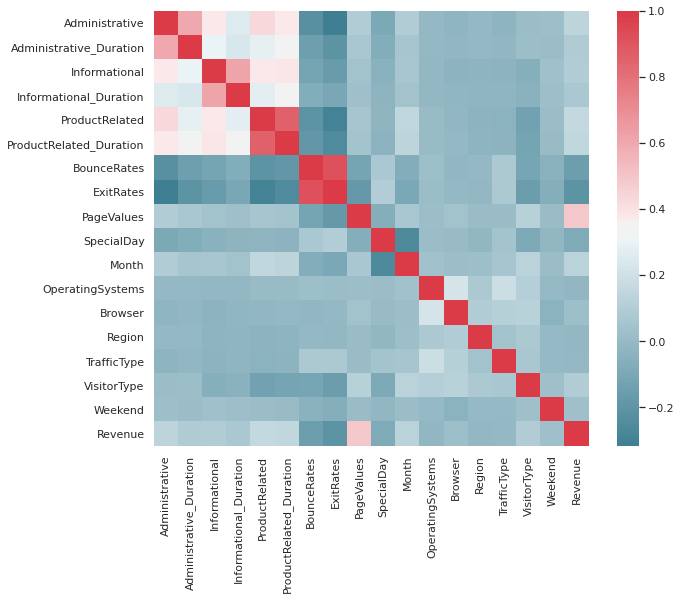

In [21]:
f, ax = plt.subplots(figsize=(10, 8))
corr =  df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

# Correlación de Revenue

Por último para obtener mas detalles de este hallazgo, utilizamos la función ExtraTreesClassifier que nos ofrece Sklearn. Con esta función confirmamos lo que nos decia el Heatmap visualmente. PageValues es la varieble que mas se relaciona con la clase y por una gran diferencia con respecto a las demas variables.

In [22]:
X = df.iloc[:, :17]
y = df.iloc[:, 17:18]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



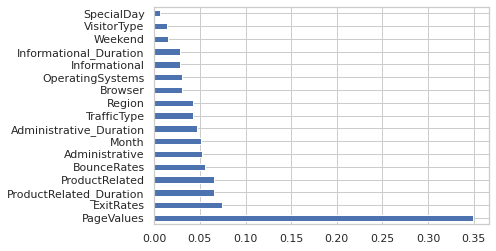

In [23]:
from sklearn.ensemble import ExtraTreesClassifier 
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y) 
#plot graph of feature importances for better visualization 
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(100).plot(kind='barh') 
plt.show()

## Análisis 1D (Post transformación de datos a flotantes)

* Count: Cantidad Total
* Mean: Promedio
* std: Desviacion Standar
* min: Valor minimo
* 25%: Cuartil 1
* 50%: Cuartil 2
* 75%: Cuartil 3
* max: Valor máximo

Con esto se pueden apreciar datos interesantes, como la gran variación que existe en algunas columnas mientras que en otras se acerca a 0. También, y lo más importante, es que se puede ver que la tendencia de la clase Revenue tiene un valor más cercano a 0 que 1, lo que significa que la mayoría de las ocasiones no se concretó la compra.

In [24]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,1.151176,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,3.000000,1.000000,1.000000


# Procesamiento de datos con algoritmos básicos

Ya se tiene una comprensión de que es lo que contiene el dataset que se está utilizando y se tiene una idea de cual es el comportamiento de las variables que lo componen, por lo que ya se puede pasar a la siguiente etapa que sería la de utilizar algoritmos básicos para comprender como se comportan los atributos en relación a la clase, en otras palabras, como los atributos influyen en el resultado final o la clase. 

Los algoritmos que se utilizarán son:
* Arboles de deciciones
* Naive bayes
* KNN



# Arbol de decisión

### Preparación de variables

Primero separamos los variables y la clase, ya que este paso será necesario para los pasos posteriores. Luego revisamos con un print para comprobar que no se haya cometido ningún error en el camino.

In [25]:
import sklearn.datasets as datasets
import pandas as pd
X = df.iloc[:, :17]
y = df.iloc[:, 17:18]
print("Valores de X")
print(X.head())

print("\n\n---------------------------------------------------------------\n\n")
print("Valores de y")
print(y)


Valores de X
   Administrative  Administrative_Duration  ...  VisitorType  Weekend
0             0.0                      0.0  ...          1.0      0.0
1             0.0                      0.0  ...          1.0      0.0
2             0.0                      0.0  ...          1.0      0.0
3             0.0                      0.0  ...          1.0      0.0
4             0.0                      0.0  ...          1.0      1.0

[5 rows x 17 columns]


---------------------------------------------------------------


Valores de y
       Revenue
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
...        ...
12325      0.0
12326      0.0
12327      0.0
12328      0.0
12329      0.0

[12330 rows x 1 columns]


También separamos nuestras variables X e Y en entrenamiento y test usando un 20% de las filas totales para test y el otro 80% para el entrenamiento. Lo que nos deja con 4 variables: X_train, x_test, y_train y y_test. Luego revisamos imprimiendo las variables.

In [26]:
from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=20,random_state=1)
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print("X entrenados\n",X_train)
print("\n X testeados\n",x_test)
print("\n \n Y entrenados\n",y_train)
print("\n Y testeados\n",y_test)

X entrenados
        Administrative  Administrative_Duration  ...  VisitorType  Weekend
1785              0.0                 0.000000  ...          1.0      0.0
10407             2.0                14.000000  ...          1.0      0.0
286               0.0                 0.000000  ...          1.0      0.0
6520              5.0                49.200000  ...          2.0      0.0
12251             0.0                 0.000000  ...          2.0      1.0
...               ...                      ...  ...          ...      ...
11964            14.0              1005.608333  ...          1.0      0.0
5191              0.0                 0.000000  ...          1.0      1.0
5390              0.0                 0.000000  ...          1.0      0.0
860               0.0                 0.000000  ...          2.0      0.0
7270              7.0               138.150000  ...          1.0      1.0

[9864 rows x 17 columns]

 X testeados
        Administrative  Administrative_Duration  ...  Visi

## Entrenamiento del Modelo

Acá lo que se hace es crear un objeto de tipo "clasificador de arboles de desiciones" y se almacena en la variable *dtree*, misma variable que posteriormentese entrena usando las variables X e Y

Para ajustar el parametro de la profundidad del arbol se realizaron multiples pruebas, algunos de los resultados fueron los que se muestran a continuación:


* Usando max_depth=3
  * Train Score : 89.34509326845094
  * Test Score : 88.3617193836172
  * Precision : 88.3617193836172
  * Recall : 88.3617193836172
  * F1 Score : 63.989962358845666
  * AUC Score : 77.8345498783455

* Usando max_depth=5
  * Train Score : 90.77453365774534
  * Test Score : 89.82157339821573
  * Precision : 89.82157339821573
  * Recall : 89.82157339821573
  * F1 Score : 65.37931034482759
  * AUC Score : 76.95863746958636

* Usando max_depth=10
  * Train Score : 93.24817518248175
  * Test Score : 92.33576642335767
  * Precision : 92.33576642335767
  * Recall : 92.33576642335767
  * F1 Score : 74.76635514018693
  * AUC Score : 82.65206812652069

* Usando max_depth=30
  * Train Score : 95.8029197080292
  * Test Score : 94.64720194647201
  * Precision : 94.64720194647201
  * Recall : 94.64720194647201
  * F1 Score : 83.54114713216958
  * AUC Score : 89.39172749391727

* Usando max_depth=60
  * Train Score : 95.72181670721817
  * Test Score : 94.8499594484996
  * Precision : 94.8499594484996
  * Recall : 94.8499594484996
  * F1 Score : 83.94437420986095
  * AUC Score : 89.2214111922141

* Usando max_depth=90
  * Train Score : 95.78264395782644
  * Test Score : 94.76885644768856
  * Precision : 94.76885644768856
  * Recall : 94.76885644768856
  * F1 Score : 83.81430363864492
  * AUC Score : 89.36739659367396

Finalmente, debido a que los el 90% se considera un valor aceptable para el caso y a que la visualización del arbol es entendible a simple vista, consideramos que usar max_depht = 5 es la mejor profundidad para sacar conclusiones sobre los resultados.



In [27]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=5)
dtree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

En esta parte se construye el arbol en sí, usando como clases RevenueTrue y RevenueFalse. Se puede observar que el arbol considera como nodo principal el correspondiente a la variable PageValues, la misma variable que fue considerada como la mas relevante en el preprocesamiento, lo que ya indica que tiene sentido y se a ido por buen camino.

En cuanto a la iterpretación, se puede decir que si se reemplaza los valores reales de una fila de la variable X[n] en el arbol, obtendremos el resultado Revenue:False o Revenue:True dependiendo de su correspondiente valor en y[n].
***

Ejemplo: Si utilizamos los datos de X[695] y vamos reemplazando obtenemos que:

* Page value 69.43 <= 0.053
  * Falso
* BounceRates 0.0 <= 0.0
  * Verdadero
* Page value 69.43 <= 0.053
  * Falso
* Administrative 5.0 <= 1.5
  * Falso
* Weekwnd 1.0 <= 5.0
  * Verdadero
* Resultado final: Revenue:True

Lo que coincide con el valor que se encuentra en y[695].

En resultado también se puede comprobar de manera mas simple con la función predict que ofrece la misma librería.

In [28]:
array = X[695:696]
dtree.predict(array)

array([1.])

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



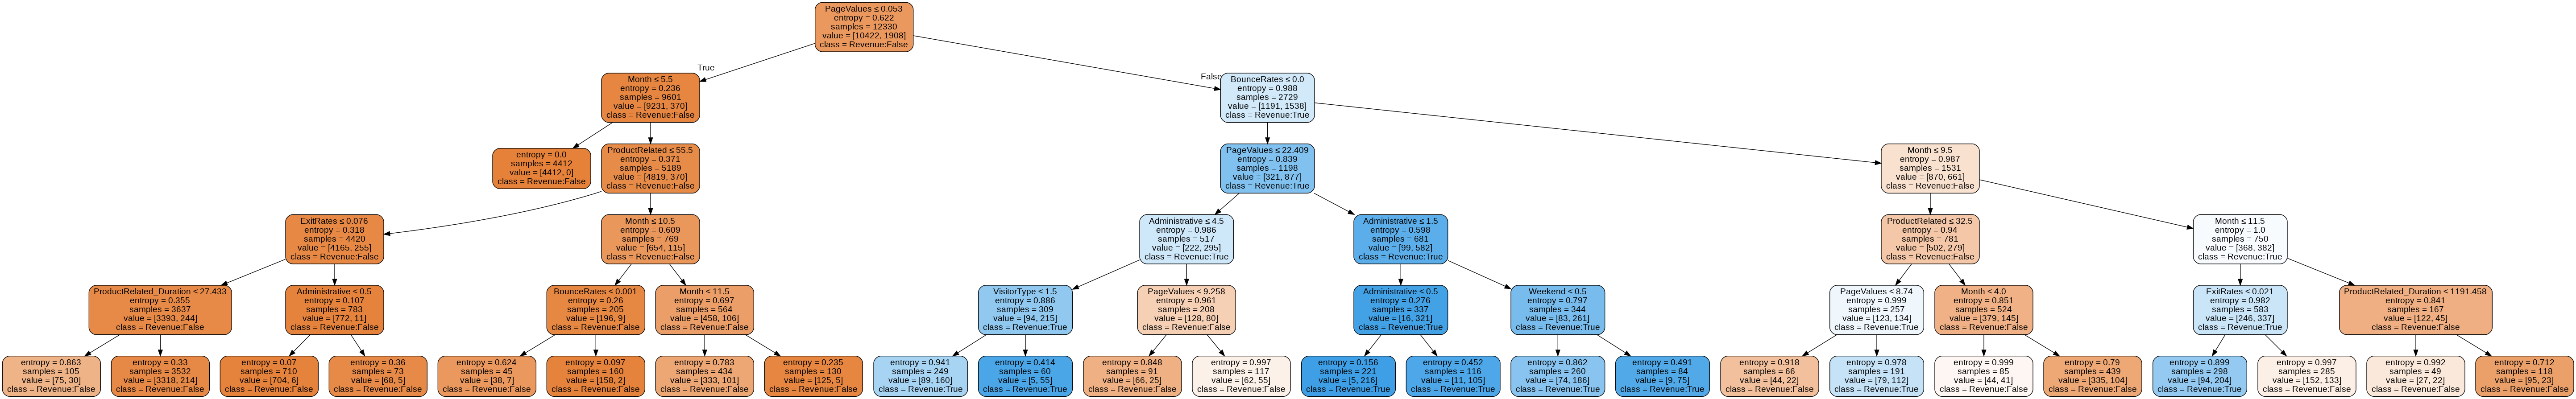

In [29]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
class_names=['Revenue:False','Revenue:True']
export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,                
                feature_names=X.columns,
                class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Función de metricas

A continuación se analizarán varias mediciones sobre el resultado de los entrenamientos, motivo por el cuál se crea la función *accuracy_suite* que resume todo lo que nos interesa por ahora.

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,roc_auc_score

def accuracy_suite(model, y_test, y_pred, average = 'binary'):
  print('Train Score :', model.score(X_train, y_train)*100)
  print('Test Score :', accuracy_score(y_test, y_pred)*100)
  print('Precision :', precision_score(y_test,y_pred,average='micro')*100)
  print('Recall :', recall_score(y_test,y_pred,average='micro')*100)
  print('F1 Score :', f1_score(y_test,y_pred, average=average)*100)
  print('AUC Score :', roc_auc_score(y_test,y_pred)*100)
  print('Confusion matrix: ')
  ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,cmap='Blues')
  bottom,top = ax.get_ylim()
  ax.set_ylim(bottom+0.5,top-0.5)
  ax.set_ylim(bottom+0.5,top-0.5)


Con la matriz de confusión se logra apreciar que:
* Alrededor de 2000 datos que originalmente eran **falsos** fueron clasisficados como **falsos**
* Alrededor de 330 datos que originalmente eran **Verdaderos** fueron clasificados como **Verdaderos**
* 48 datos que originalmente eran **falsos** fueron clasificados como **verdaderos**
* 79 datos que originalmenete eran **verdaderos** fueron clasificados como **falsos**

Train Score : 90.77453365774534
Test Score : 89.82157339821573
Precision : 89.82157339821573
Recall : 89.82157339821573
F1 Score : 65.37931034482759
AUC Score : 76.95863746958636
Confusion matrix: 


Text(0.5, 1.0, 'Confusion Matrix of DT')

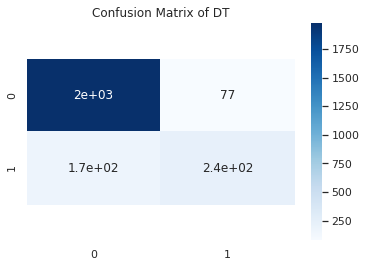

In [31]:
y_pred = dtree.predict(x_test)
accuracy_suite(dtree, y_test, y_pred)
plt.title('Confusion Matrix of DT')

In [32]:
for i in range(1, 5):
  for j in range(1, 5):
    dtree_test = DecisionTreeClassifier(criterion='entropy',max_depth=i,min_samples_leaf=j)
    dtree_test.fit(X,y)
    y_pred_2 = dtree_test.predict(x_test)
    acc_test = accuracy_score(y_test, y_pred_2)*100
    print(acc_test)


87.14517437145174
87.14517437145174
87.14517437145174
87.14517437145174
87.71289537712896
87.71289537712896
87.71289537712896
87.71289537712896
88.3617193836172
88.3617193836172
88.3617193836172
88.3617193836172
89.82157339821573
89.82157339821573
89.82157339821573
89.82157339821573


Con el fin de comparar los el resultado del primer modelo, procedemos a generar, entrenar y testear los siguientes modelos.

# Naive Bayes

Con la matriz de confusión se logra apreciar que:

* Alrededor de 1900 datos que originalmente eran **falsos** fueron clasisficados como **falsos**
* Alrededor de 220 datos que originalmente eran **Verdaderos** fueron clasificados como **Verdaderos**
* Alrededor de 190 datos que originalmente eran **falsos** fueron clasificados como **verdaderos**
* Alrededor de 200 datos que originalmenete eran **verdaderos** fueron clasificados como **falsos**

Train Score : 84.65125709651257
Test Score : 84.34712084347122
Precision : 84.34712084347122
Recall : 84.34712084347122
F1 Score : 52.81173594132029
AUC Score : 71.6301703163017
Confusion matrix: 


Text(0.5, 1.0, 'Confusion Matrix of NB')

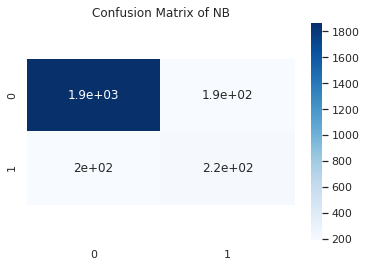

In [33]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, np.ravel(y_train))
y_pred = nb.predict(x_test)
accuracy_suite(nb, y_test, y_pred)
plt.title('Confusion Matrix of NB')

# KNN


Para la implementación del KNN lo primero que se hizo fué revisar el error para cada K usando un bucle for, con el objetivo de graficar los datos obtenidos y detectar de manera sencilla cual es el mejor K a utilizar.

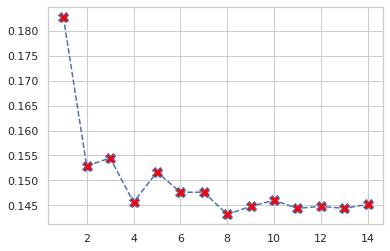

In [34]:
from sklearn.neighbors import KNeighborsClassifier
# KNN

error_rate = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,np.ravel(y_train))
    pred_y = knn.predict(x_test)
    error_rate.append(np.mean(pred_y!= np.ravel(y_test)))
plt.plot(range(1,15),error_rate,marker='X',linestyle='dashed',markerfacecolor='red', markersize=10)

Con la matriz de confusión se logra apreciar que:

* Alrededor de 2000 datos que originalmente eran **falsos** fueron clasisficados como **falsos**
*  81 datos que originalmente eran **Verdaderos** fueron clasificados como **Verdaderos**
* Alrededor de 190 datos que originalmente eran **falsos** fueron clasificados como **verdaderos**
* Alrededor de 200 datos que originalmenete eran **verdaderos** fueron clasificados como **falsos**

Train Score : 88.169099756691
Test Score : 85.6853203568532
Precision : 85.6853203568532
Recall : 85.6853203568532
F1 Score : 31.456310679611647
AUC Score : 59.29440389294404
Confusion matrix: 


Text(0.5, 1.0, 'Confusion Matrix of KNN')

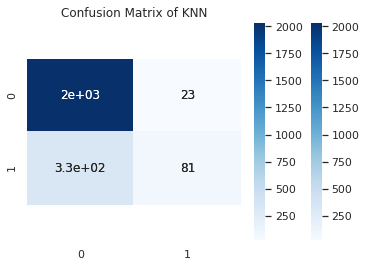

In [35]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, np.ravel(y_train))
y_pred = knn.predict(x_test)
accuracy_suite(knn, y_test, y_pred)

ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,cmap='Blues')
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
ax.set_ylim(bottom+0.5,top-0.5)
plt.title('Confusion Matrix of KNN')

# Conclusión Procesamiento de datos

habiendo ya revisado el rendimiento que tienen los tres algoritmos previamente mencionados y utilizados, se puede asegurar sin ninguna duda que el mejor de estos algoritmos para este dataset en específico es el de Árboles de Decisiones ya que 95% de los datos fueron clasificados correctamente (Accuracy) según la matriz de confusión, mientras que Naive Bayes solo un 84% y KNN un 85%.

Estos resultados obtenidos en Árboles de decisiones nos dicen que los buenos resultados obtenidos en las distintas métricas no se deben a overfitting, y por ende, son resultados confiables y bastante aceptables si se quiere llegar a precedir nuevos registros.


# Experimento - Algoritmo Innovador

# Cross-Validation
### Imagen de referencia

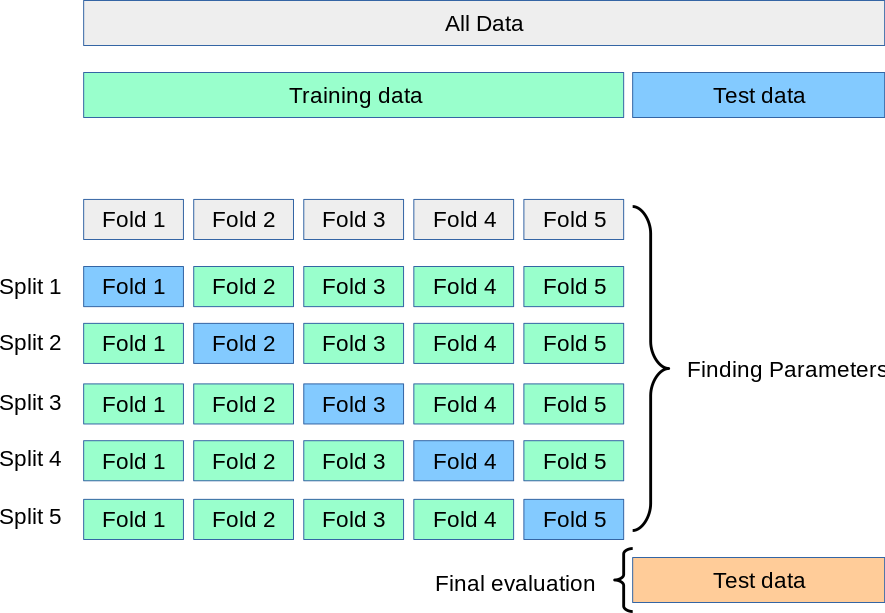


# K-means, KNN y Cross Validation


En primer lugar, se utilizó el algoritmo hibrido que combina tanto el algoritmo de KMeans, KNN y el metodo de particion de Cross Validation.

In [36]:
# Funcion para buscar un valor (key) en diccionario.
def get_key(val, dict_): 
    for key, value in dict_.items(): 
         if val == value: 
             return key 
  
    return "key no existe"

En este modulo, el algoritmo hibrido usa para cada particion distintos training y testing sets, y de esta forma, utiliza el algoritmo de KMeans para obtener centroides (labels) para luego ser usado en entrenamiento de KNN.
Al final se muestran los resultados de cada Fold, por cluster, y por cada K vecino.

In [37]:

from sklearn.cluster import KMeans
from sklearn.model_selection import KFold

scores_knn = []
cv = KFold(n_splits=10, random_state=42, shuffle=True)
nfold, index = 1, 0
train_test_sets, score_per_k, best_score_per_k = [], [], []
scores_knn_dict = {}

for train_index, test_index in cv.split(X):

  print(f'\nParticion de CV con Fold: {nfold}')
  X_train_fold, X_test_fold, y_train_fold, y_test_fold = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
  train_test_sets.append([[nfold], [X_train_fold], [X_test_fold], [y_train_fold], [y_test_fold]])
  nfold += 1

  for cluster in range(2, 21, 2):
    km_model = KMeans(n_clusters=cluster, random_state=42)
    km_model.fit(X_train_fold)
    km_labels = km_model.labels_
    print(f"\nLabel {cluster}, {km_labels}")
    print(f"[Fold(CV), Clusters (K-means), K (KNN), Score]")

    for k_neighbours in range(2, 12):
      (ಠ‿ಠ) = k_neighbours
      knn_model= KNeighborsClassifier(n_neighbors=(ಠ‿ಠ))
      knn_model.fit(X_train_fold, km_labels)
      knn_score = knn_model.score(X_train_fold, km_labels)
      scores_knn.append([nfold - 1, cluster, k_neighbours-1, knn_score])
      scores_knn_dict[k_neighbours-1] = knn_score
      score_per_k.append(knn_score)
      print(scores_knn[index])
      index += 1
  
    best_k_neighbours = get_key(max(score_per_k), scores_knn_dict)
    best_score_per_k.append([[nfold - 1], [cluster], [best_k_neighbours], [max(score_per_k)]])
    score_per_k.clear()
    scores_knn_dict = {}


Particion de CV con Fold: 1

Label 2, [0 0 0 ... 0 0 0]
[Fold(CV), Clusters (K-means), K (KNN), Score]
[1, 2, 1, 0.9992790844372353]
[1, 2, 2, 0.9998197711093089]
[1, 2, 3, 0.9994593133279265]
[1, 2, 4, 0.9997296566639632]
[1, 2, 5, 0.9990988555465441]
[1, 2, 6, 0.9992790844372353]
[1, 2, 7, 0.998918626655853]
[1, 2, 8, 0.9992790844372353]
[1, 2, 9, 0.9992790844372353]
[1, 2, 10, 0.9991889699918897]

Label 4, [0 0 0 ... 2 0 0]
[Fold(CV), Clusters (K-means), K (KNN), Score]
[1, 4, 1, 0.9982878255384338]
[1, 4, 2, 0.9987383977651617]
[1, 4, 3, 0.9982878255384338]
[1, 4, 4, 0.9986482833198161]
[1, 4, 5, 0.9977471388663602]
[1, 4, 6, 0.9981977110930882]
[1, 4, 7, 0.9979273677570515]
[1, 4, 8, 0.9982878255384338]
[1, 4, 9, 0.9977471388663602]
[1, 4, 10, 0.9981075966477426]

Label 6, [5 5 5 ... 0 5 5]
[Fold(CV), Clusters (K-means), K (KNN), Score]
[1, 6, 1, 0.9974767955303235]
[1, 6, 2, 0.998468054429125]
[1, 6, 3, 0.997386681084978]
[1, 6, 4, 0.997386681084978]
[1, 6, 5, 0.9972965666396323

Luego se muestran los resultados del mejor K por Partición (Fold):

In [38]:
score_knn_dict2 = {}
knn_scores_2, results_per_fold, knn_values_2 = [], [], []
k_val = 0
for fold in range(10):
  for i in range(10):
    knn_scores_2.append(best_score_per_k[k_val][3][0])
    knn_values_2.append(best_score_per_k[k_val][2][0])
    k_val += 1
  
  max_value = max(knn_scores_2)
  index_k = knn_scores_2.index(max_value)
  results_per_fold.append([[fold+1], [knn_values_2[index_k]], [max_value]])
  knn_scores_2, knn_values_2 = [], []
print("[# Fold(CV), Best K per fold (KNN), Best Score]")
results_per_fold

[# Fold(CV), Best K per fold (KNN), Best Score]


[[[1], [2], [0.9998197711093089]],
 [[2], [2], [0.999549427773272]],
 [[3], [2], [0.9997296566639632]],
 [[4], [4], [0.9997296566639632]],
 [[5], [2], [0.9996395422186176]],
 [[6], [6], [0.9997296566639632]],
 [[7], [2], [0.9994593133279265]],
 [[8], [2], [0.9996395422186176]],
 [[9], [2], [0.9994593133279265]],
 [[10], [2], [0.9994593133279265]]]

Luego se testea el modelo del clasificador con la particion y K vecino que dio mejor accuracy, mostrando los resultados al final.

In [39]:
list_scores = []
for fold in range(10):

  X_train_subset, X_test_subset = train_test_sets[fold][1][0], train_test_sets[fold][2][0]
  y_train_subset, y_test_subset = train_test_sets[fold][3][0], train_test_sets[fold][4][0]

  knn_bestmodel = KNeighborsClassifier(n_neighbors=results_per_fold[fold][1][0])
  knn_bestmodel.fit(X_train_subset, np.ravel(y_train_subset))
  bestknn_score = knn_model.score(X_test_subset, y_test_subset)
  list_scores.append(bestknn_score)
  print(f"Fold(CV) for Test set: {fold + 1}, K(KNN) per fold: {results_per_fold[fold][1][0]}, Test Score: {bestknn_score}")

Fold(CV) for Test set: 1, K(KNN) per fold: 2, Test Score: 0.31062449310624496
Fold(CV) for Test set: 2, K(KNN) per fold: 2, Test Score: 0.28548256285482565
Fold(CV) for Test set: 3, K(KNN) per fold: 2, Test Score: 0.30170316301703165
Fold(CV) for Test set: 4, K(KNN) per fold: 4, Test Score: 0.28386050283860503
Fold(CV) for Test set: 5, K(KNN) per fold: 2, Test Score: 0.2935928629359286
Fold(CV) for Test set: 6, K(KNN) per fold: 6, Test Score: 0.29764801297648014
Fold(CV) for Test set: 7, K(KNN) per fold: 2, Test Score: 0.28629359286293593
Fold(CV) for Test set: 8, K(KNN) per fold: 2, Test Score: 0.26926196269261965
Fold(CV) for Test set: 9, K(KNN) per fold: 2, Test Score: 0.28386050283860503
Fold(CV) for Test set: 10, K(KNN) per fold: 2, Test Score: 0.2935928629359286


A continuación se muestra el promedio y desviacion estandar del modelo con el set de training

In [40]:
mean_acc = np.average(list_scores)
std_acc = np.std(list_scores)
print(mean_acc)
print(std_acc)

0.2905920519059206
0.010875365055569413


En ultima instancia se muestran los resultados solo usando las particiones de datos de Cross Validation con K=1:10 en el modelo de KNN, y luego testeando los datos de prueba.

In [44]:

error_rate, accuracy, precision, recal, fScore, list_acc_total = [], [], [], [], [], []

for fold in range(10):
  X_train_subset, X_test_subset = train_test_sets[fold][1][0], train_test_sets[fold][2][0]
  y_train_subset, y_test_subset = train_test_sets[fold][3][0], train_test_sets[fold][4][0]
  for k_values in range(10):
    X_train_subset, X_test_subset = train_test_sets[k_values][1][0], train_test_sets[k_values][2][0]
    y_train_subset, y_test_subset = train_test_sets[k_values][3][0], train_test_sets[k_values][4][0]

    knn_model_along = KNeighborsClassifier(n_neighbors=k_values+1)
    knn_model_along.fit(X_train_subset, np.ravel(y_train_subset))
    y_pred = knn.predict(X_test_subset)
    score_knn_along = accuracy_score(y_test_subset, y_pred)
    print(f'Fold: {fold+1}, K value per fold: {k_values+1}, Accuracy: {score_knn_along}')
    accuracy.append(score_knn_along)
    list_acc_total.append(score_knn_along)
  print(f'\nPromedio por Fold: {np.mean(accuracy)}')
  accuracy = []


Fold: 1, K value per fold: 1, Accuracy: 0.8564476885644768
Fold: 1, K value per fold: 2, Accuracy: 0.8572587185725872
Fold: 1, K value per fold: 3, Accuracy: 0.8864557988645579
Fold: 1, K value per fold: 4, Accuracy: 0.8759124087591241
Fold: 1, K value per fold: 5, Accuracy: 0.8848337388483374
Fold: 1, K value per fold: 6, Accuracy: 0.8815896188158961
Fold: 1, K value per fold: 7, Accuracy: 0.8880778588807786
Fold: 1, K value per fold: 8, Accuracy: 0.8661800486618005
Fold: 1, K value per fold: 9, Accuracy: 0.8856447688564477
Fold: 1, K value per fold: 10, Accuracy: 0.8848337388483374

Promedio por Fold: 0.8767234387672345
Fold: 2, K value per fold: 1, Accuracy: 0.8564476885644768
Fold: 2, K value per fold: 2, Accuracy: 0.8572587185725872
Fold: 2, K value per fold: 3, Accuracy: 0.8864557988645579
Fold: 2, K value per fold: 4, Accuracy: 0.8759124087591241
Fold: 2, K value per fold: 5, Accuracy: 0.8848337388483374
Fold: 2, K value per fold: 6, Accuracy: 0.8815896188158961
Fold: 2, K value

El promedio de las precisiones (accuracy) anteriores de cada fold se muestran a continuación

In [ ]:
print(f'Promedio para todos los Folds: {np.mean(list_acc_total)}')

Como se puede ver, los resultados del ultimo KNN tienen un accuracy mayor al probado con el algoritmo hibrido, lo que significa que probar el algoritmo con cada cluster no muestra necesariamente una mejora en la precision de testeo del modelo clasificador, ya que el ultimo modelo que solo utiliza KNN con los datos de Cross Validation obtienen tanto para cada fold como para el promedio total un resultado mucho mayor.

# Conclusión Final

Contextualizando, en este trabajo se realizaron muchas actividades en relación a la predicción de compra de una persona en un comercio electrónico. Primeramente se tomó una data set en particular que contenía atributos categóricos y atributos numéricos, los cuales a través de un preprocesamiento de datos que nos ayudó a  para integrar los datos para que no se mezclen, calcular el análisis 1D de los datos, tratar los outliers para minimizar inconsistencias y discretizar las variables, luego de esto profundizamos en la correlación de las variables para identificar la relación entre las variables y así encontrar cuales tienen correlación positiva con la clase del dataset, todo lo realizado en la primera fase del proyecto era para trabajar la data set, analizarla, entenderla y así poder empezar a implementar los algoritmos de predicción.


En la segunda fase del proyecto, ya con la data set más trabajada y comprendida se comenzó a implementar algoritmos básicos de predicción para identificar el comportamiento de los atributos en relación a la clase, se utilizó decisión tree, KNN y Naive Bayes para las pruebas. Se separan los atributos de la clase para que así podamos tener atributos de Prueba y de Entrenamiento, se implementaron los algoritmos de predicción de forma secuencial y los resultados entregados por cada uno de estos algoritmos fueron mostrados por una suite de precisión y matrices de confusión, la cual en nuestro caso particular entrego que Decision Tree es el mejor algoritmo para esta Data Set especifica.


Y en la última fase del proyecto se buscó innovar mezclando K-Means con KNN. La idea es crear particiones con CrossValidation utilizar K-Means en cada partición y en cada clúster generado por K-Means aplicar KNN en cada partición y elegir el K con mejor rendimiento, una vez obtenido los resultados se realiza un análisis de los datos con distintas medidas para visualizar tasa de acierto, error y desviación estándar.



Este proyecto busco que pasáramos por cada uno de los puntos a considerar en las características de un proyecto de ciencia de datos, Importación de librerías, descarga del DataSet con el que se trabajará, realizar el preprocesamiento de los datos, realizar análisis de los datos, implementar algoritmos de predicción básicos para trabajar con la Data, entrenar los modelos y por último implementación de un algoritmo innovador. Cada uno de estos pasos realizados en el proyecto logro que nos desenvolviéramos y aprendiéramos lo que se debe realizar en los proyectos de esta índole, aplicando cada punto de manera lineal y práctica.